# Project ML version 2 


In [192]:
import pandas as pd
appointment=pd.read_csv("KaggleV2-May-2016.csv")

In [193]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [194]:
appointment.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [195]:
appointment.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

## Descriptive stats 

- do the plots with show and no show depending on several parameter, maybe look at the correlations...


### gestion of dates and types in general 

In [196]:
import numpy as np 


appointment.AppointmentDay = appointment.AppointmentDay.apply(np.datetime64)
appointment.ScheduledDay = appointment.ScheduledDay.apply(np.datetime64)
#appointment.AwaitingTime = appointment.AwaitingTime.apply(abs)

In [197]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,No


In [198]:
appointment['Gender'] = appointment['Gender'].astype('category')
appointment['Neighbourhood'] = appointment['Neighbourhood'].astype('category')

appointment['No-show'] = appointment['No-show'].map({'Yes': '1', 'No': '0'})
#appointment['No-show'] = appointment['No-show'].astype('bool')


#appointment['Scholarship'] = appointment['Scholarship'].astype('bool')


#appointment['Hipertension'] = appointment['Hipertension'].astype('bool')


#appointment['Diabetes'] = appointment['Diabetes'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Alcoholism'] = appointment['Alcoholism'].astype('bool')


#appointment['Handcap'] = appointment['Handcap'].astype('bool')


#appointment['SMS_received'] = appointment['SMS_received'].astype('bool')

appointment['AppointmentID'] = appointment['AppointmentID'].astype('category')

In [199]:
appointment.dtypes

PatientId                float64
AppointmentID           category
Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood           category
Scholarship                int64
Hipertension               int64
Diabetes                   int64
Alcoholism                 int64
Handcap                    int64
SMS_received               int64
No-show                   object
dtype: object

In [200]:
appointment.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,1
8,5.639473e+13,5638447,F,2016-04-29 08:02:16,2016-04-29,21,ANDORINHAS,0,0,0,0,0,0,0
9,7.812456e+13,5629123,F,2016-04-27 12:48:25,2016-04-29,19,CONQUISTA,0,0,0,0,0,0,0


## Feature engineering 

#### we will now modify our variables to have the final dataset

- creation of one variable representing the difference between schedule and appointement day,
- patient id and Appointment id to drop or to convert into float/int 
- scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 

- Appointment day, 
    - year 
    - month -> one-hot encoded 
    - day of the week -> one hot encoded 
- Neighboorhood: one hot encoded and maybe drop some columns... 
- one hot encoding for Gender


creation of a variable for the difference between the scheduleDay and the Appointement day

In [201]:
appointment['differenceDay']=appointment['AppointmentDay']-appointment['ScheduledDay']
# put in hours differences
appointment['differenceDay'] = appointment['differenceDay'].apply(lambda x: x.total_seconds()/3600)
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

In [202]:
# abs value  
appointment['differenceDay']=abs(appointment['differenceDay'])

- patient id and Appointment id to drop or to convert into float/int, might add some predictive power 

In [220]:
appointment['PatientId'] = appointment['PatientId'].astype('float')
appointment['AppointmentID'] = appointment['AppointmentID'].astype('float')

# - scheduleDay changed into several variables
    - year if there is several
    - month -> one hot encoded ? 
    - day 
    - maybe actually day of the week would make more sens -> one-hot encoded ? 
    - hour 



In [229]:
appointment['ScheduledDay'][1].year

2016

In [287]:
import datetime
appointment['ScheduledDay'] = pd.to_datetime(appointment['ScheduledDay'])


appointment['Year_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).year
appointment['Month_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).month
appointment['Day_S'] = pd.DatetimeIndex(appointment['ScheduledDay']).day
appointment['Hour'] = pd.DatetimeIndex(appointment['ScheduledDay']).hour
appointment['DOW_S']=pd.DatetimeIndex(appointment['ScheduledDay']).dayofweek
appointment['DOW_S'] = appointment['DOW_S'].astype('category')
#appointment['DOW_S'].value_counts()

In [290]:
### To be done change the var down_S into 0-> Monday etc ... 

In [291]:
# We will put the variable day of the week as categorical and change the values 

#appointment['DOW_S'] = appointment['DOW_S'].astype('category')

#mapping = {'5': 'Saturday', '0': 'Monday', '1': 'Tuesday', '2': 'Wednesday', '3': 'Thursday', '4': 'Friday'}
#appointment['DOW_S'] = appointment['DOW_S'].map({ 4: 'Friday'})
#appointment['DOW_S'] = appointment['DOW_S'].astype('category')
#appointment.replace({'DOW_S': mapping})

In [289]:
#appointment['DOW_S'] = appointment['DOW_S'].astype('category')
#appointment['DOW_S'][1:10]


1    Friday
2    Friday
3    Friday
4    Friday
5       NaN
6       NaN
7       NaN
8    Friday
9       NaN
Name: DOW_S, dtype: object

### split into train and test 

In [204]:
X=appointment.loc[:, appointment.columns != 'No-show']
y=appointment['No-show']

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=11)

In [205]:
X_train.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay
65804,4.684362e+14,5667828,F,2016-05-06 08:09:54,2016-05-06,1,JARDIM CAMBURI,0,0,0,0,0,0,8.165000
38855,7.222263e+11,5543382,F,2016-04-05 10:05:09,2016-05-04,49,DO CABRAL,0,0,0,1,0,1,685.914167
8434,2.688613e+13,5738866,M,2016-05-25 11:48:03,2016-05-25,63,SANTA MARTHA,0,0,0,1,0,0,11.800833
8837,8.121397e+13,5723661,M,2016-05-20 08:28:57,2016-05-20,48,MÁRIO CYPRESTE,0,0,0,0,0,0,8.482500
60571,2.224798e+12,5617054,M,2016-04-25 15:19:10,2016-05-11,45,PRAIA DO CANTO,0,1,0,0,0,1,368.680556


### Creation of a balance Xtrain, Y train from bootsraping for prediction 


In [206]:
X2= X_train
X2["No-show"]=y_train

/Users/victor/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
X2.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,No-show
65804,4.684362e+14,5667828,F,2016-05-06 08:09:54,2016-05-06,1,JARDIM CAMBURI,0,0,0,0,0,0,8.165000,0
38855,7.222263e+11,5543382,F,2016-04-05 10:05:09,2016-05-04,49,DO CABRAL,0,0,0,1,0,1,685.914167,0
8434,2.688613e+13,5738866,M,2016-05-25 11:48:03,2016-05-25,63,SANTA MARTHA,0,0,0,1,0,0,11.800833,0
8837,8.121397e+13,5723661,M,2016-05-20 08:28:57,2016-05-20,48,MÁRIO CYPRESTE,0,0,0,0,0,0,8.482500,0
60571,2.224798e+12,5617054,M,2016-04-25 15:19:10,2016-05-11,45,PRAIA DO CANTO,0,1,0,0,0,1,368.680556,0


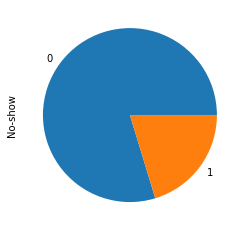

In [208]:
import matplotlib as plt
X2['No-show'].value_counts().plot(kind='pie')

In [209]:
# Class count
X2['No-show'].value_counts()

0    70480
1    17941
Name: No-show, dtype: int64

 We would like to do a balanced data of 30 000 of each class using bootstrap 

In [210]:

# Divide by class
X2_0 = X2[X2['No-show'] == '0']
X2_1 = X2[X2['No-show'] == '1']

In [211]:
# Bootstrap
X2_0_boot = X2_0.sample(n=30000, replace=True)
X2_1_boot = X2_1.sample(n=30000, replace=True)
X2_boot = pd.concat([X2_0_boot, X2_1_boot], axis=0)

In [212]:
X2_boot['No-show'].value_counts()

0    30000
1    30000
Name: No-show, dtype: int64

In [213]:
X2_boot.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,No-show
85613,5.135773e+13,5784715,F,2016-06-07 17:02:43,2016-06-08,30,SANTO ANTÔNIO,0,0,0,0,0,0,6.954722,0
44352,6.538343e+12,5628668,M,2016-04-27 11:24:03,2016-05-20,37,JABOUR,0,0,0,0,0,0,540.599167,0
24043,5.913694e+14,5686971,F,2016-05-11 14:26:30,2016-05-31,23,SANTA MARTHA,1,0,0,1,0,1,465.558333,0
7323,9.452745e+12,5719235,M,2016-05-19 10:49:01,2016-05-19,59,JUCUTUQUARA,0,0,0,0,0,0,10.816944,0
50155,3.797936e+14,5607718,F,2016-04-20 12:15:54,2016-05-17,67,JARDIM DA PENHA,0,0,0,0,0,0,635.735000,0


In [214]:
# we just gonna change the order maybe do some one hot enco, also need the descriptive stats 
from sklearn.utils import shuffle
X2_boot = shuffle(X2_boot)
X2_boot.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,differenceDay,No-show
13114,3.552963e+13,5630108,F,2016-04-27 14:46:48,2016-05-02,25,MONTE BELO,0,0,0,0,0,1,105.220000,0
88321,3.857853e+13,5757423,F,2016-06-01 09:23:25,2016-06-01,58,SANTA MARTHA,0,1,0,0,0,0,9.390278,0
86736,6.792345e+13,5763601,F,2016-06-02 09:10:19,2016-06-02,2,NOVA PALESTINA,0,0,0,0,0,0,9.171944,0
96126,8.471392e+11,5704831,F,2016-05-16 16:45:24,2016-06-08,66,JARDIM DA PENHA,0,1,0,0,0,1,535.243333,0
68802,8.776574e+14,5718568,F,2016-05-19 09:41:19,2016-05-24,39,TABUAZEIRO,0,0,0,0,0,1,110.311389,1


In [215]:
# might be worth it to do one hot encoding 

X2_boot['Neighbourhood'].value_counts()

JARDIM CAMBURI                 4009
MARIA ORTIZ                    3154
RESISTÊNCIA                    2370
ITARARÉ                        2132
JARDIM DA PENHA                1976
                               ... 
ILHA DO BOI                      20
AEROPORTO                         6
ILHA DO FRADE                     4
PARQUE INDUSTRIAL                 1
ILHAS OCEÂNICAS DE TRINDADE       1
Name: Neighbourhood, Length: 81, dtype: int64

In [216]:
X_train_b=X2_boot.loc[:, appointment.columns != 'No-show']
y_train_b=X2_boot['No-show']

# Premiers models

### supervised 

- decision tree
- logistic regression
- SVM 
- naive bayes  ?? 
- random forest

In [217]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from IPython.display import Image  
import pydotplus

In [ ]:
# need to do some one-hot encoding 





In [219]:
clf = tree.DecisionTreeClassifier(random_state=10)
clf = clf.fit(X_train_b, y_train_b)

ValueError: could not convert string to float: 'F'

In [ ]:
# This still need to be interpret with the actual original variable. 
plt.figure(figsize=(30,30))
tree.plot_tree(clf)

plt.show()